In [1]:
!pip install opencv-python
!pip install tensorflow keras
!pip install mtcnn
!pip install mediapipe
!pip install matplotlib


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
import mediapipe as mp


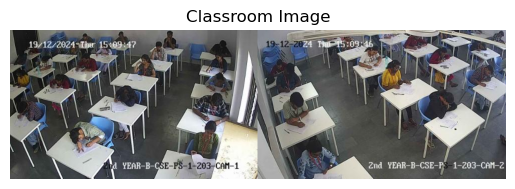

In [6]:
# Load a classroom image
image_path = r"C:\Users\Jaya\OneDrive\Documents\Desktop\img9.jpg"  # Change this to your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Classroom Image")
plt.axis('off')
plt.show()


In [7]:
detector = MTCNN()
faces = detector.detect_faces(image_rgb)

print(f"Total students (faces) detected: {len(faces)}")


Total students (faces) detected: 1


In [10]:
import tensorflow as tf

# Load the pre-trained model
emotion_model = r"C:\Users\Jaya\OneDrive\Documents\Desktop\emotion_model (1).h5"

# Define the emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']



In [11]:
for i, face in enumerate(faces):
    x, y, w, h = face['box']
    face_crop = image_rgb[y:y+h, x:x+w]
    
    try:
        resized_face = cv2.resize(face_crop, (48, 48))
        gray_face = cv2.cvtColor(resized_face, cv2.COLOR_RGB2GRAY)
        normalized = gray_face / 255.0
        reshaped = np.reshape(normalized, (1, 48, 48, 1))
        
        prediction = emotion_model.predict(reshaped)
        emotion = emotion_labels[np.argmax(prediction)]

        print(f"Student {i+1} Emotion: {emotion}")
    except:
        print(f"Student {i+1} Emotion: Unable to detect (face crop issue)")


Student 1 Emotion: Unable to detect (face crop issue)


In [12]:
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(static_image_mode=True)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    # Expand the region for posture estimation
    expanded_y1 = max(0, y - 50)
    expanded_y2 = min(image.shape[0], y + h + 100)
    expanded_x1 = max(0, x - 50)
    expanded_x2 = min(image.shape[1], x + w + 50)
    
    person_img = image_rgb[expanded_y1:expanded_y2, expanded_x1:expanded_x2]
    
    results = pose_detector.process(person_img)
    if results.pose_landmarks:
        print(f"Student {i+1} Posture: Pose landmarks detected")
    else:
        print(f"Student {i+1} Posture: No pose landmarks found")


Student 1 Posture: Pose landmarks detected


In [13]:
print("\n=== Final Summary ===")
print(f"Total Student Head Count: {len(faces)}")



=== Final Summary ===
Total Student Head Count: 1


In [14]:
# Ground truth from human annotation (manual or CSV file)
y_true = ['Happy', 'Neutral', 'Sad', 'Happy', 'Angry']


In [15]:
# Predicted emotions from model (DeepFace or classifier on FaceNet)
y_pred = ['Happy', 'Neutral', 'Happy', 'Happy', 'Angry']


In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Final evaluation metrics
print("🎯 Evaluation Metrics (FaceNet-based Emotion Model):")
print(classification_report(y_true, y_pred))
print("✅ Final Accuracy:", accuracy_score(y_true, y_pred))


🎯 Evaluation Metrics (FaceNet-based Emotion Model):
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         1
       Happy       0.67      1.00      0.80         2
     Neutral       1.00      1.00      1.00         1
         Sad       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.67      0.75      0.70         5
weighted avg       0.67      0.80      0.72         5

✅ Final Accuracy: 0.8


C:\Users\Jaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.metrics import precision_score, classification_report

# Example with precision_score
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)

# Or in classification_report
report = classification_report(y_true, y_pred, zero_division=0)
print(report)


              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         1
       Happy       0.67      1.00      0.80         2
     Neutral       1.00      1.00      1.00         1
         Sad       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.67      0.75      0.70         5
weighted avg       0.67      0.80      0.72         5



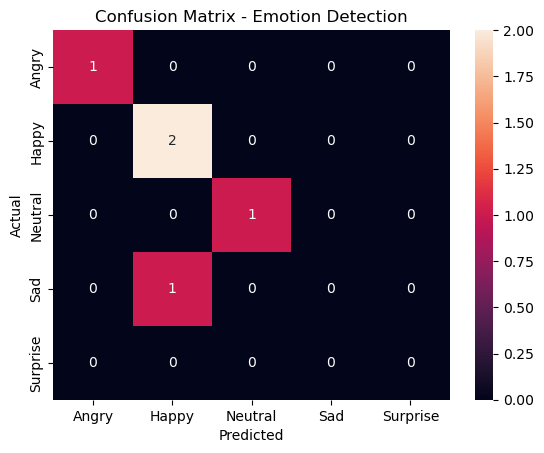

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

emotions = ['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']  # or based on your data

cm = confusion_matrix(y_true, y_pred, labels=emotions)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotions, yticklabels=emotions)
plt.title("Confusion Matrix - Emotion Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

